## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [60]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline 

import warnings

warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [61]:
customer_set = pd.read_csv('Mall_Customers.csv')

customer_set = customer_set.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
})

print(customer_set.head())

   CustomerID  Gender  Age  Income  SpendingScore
0           1    Male   19      15             39
1           2    Male   21      15             81
2           3  Female   20      16              6
3           4  Female   23      16             77
4           5  Female   31      17             40


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [62]:
print("Dataset attributes:")
print(customer_set.columns)

print("\nDataset shape:")
print(customer_set.shape)

print("\nBasic statistical information for numerical variables:")
print(customer_set.describe())

print("\nChecking for NaN values:")
print(customer_set.isna().sum())

Dataset attributes:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

Dataset shape:
(200, 5)

Basic statistical information for numerical variables:
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000

Checking for NaN values:
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [63]:
customer_set = customer_set.drop(columns=['CustomerID'])

print("Dataset after dropping 'CustomerID':")
print(customer_set.head())

Dataset after dropping 'CustomerID':
   Gender  Age  Income  SpendingScore
0    Male   19      15             39
1    Male   21      15             81
2  Female   20      16              6
3  Female   23      16             77
4  Female   31      17             40


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

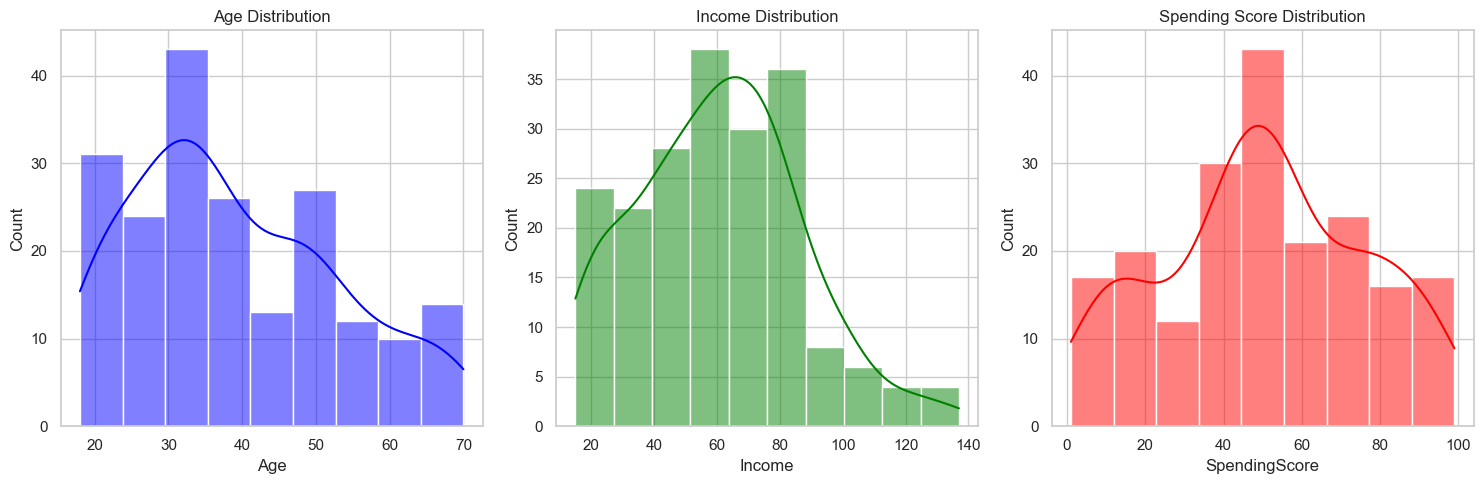

In [64]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(customer_set['Age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(customer_set['Income'], kde=True, color='green')
plt.title('Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(customer_set['SpendingScore'], kde=True, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

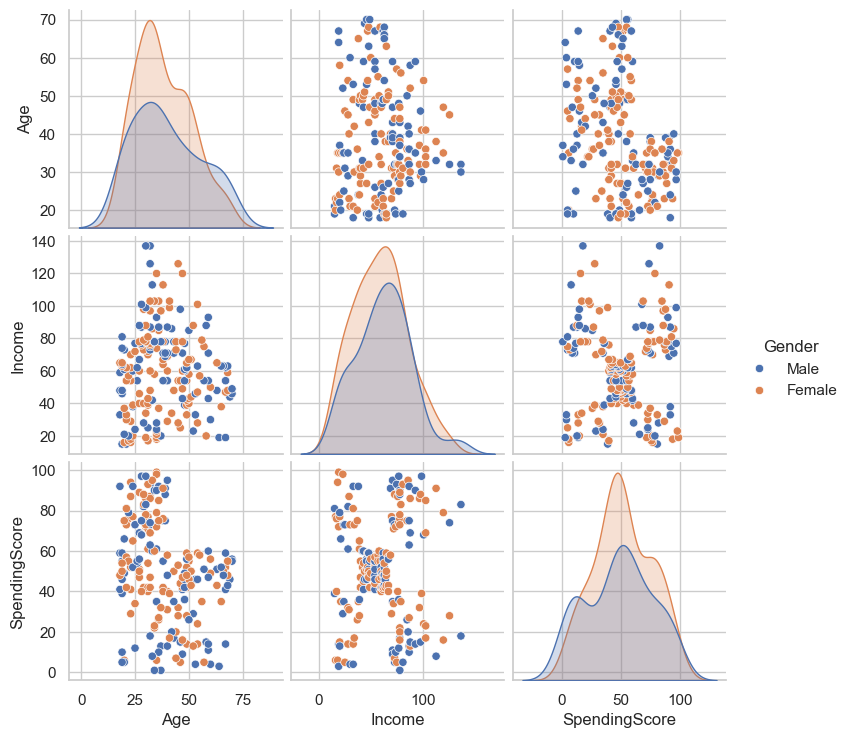

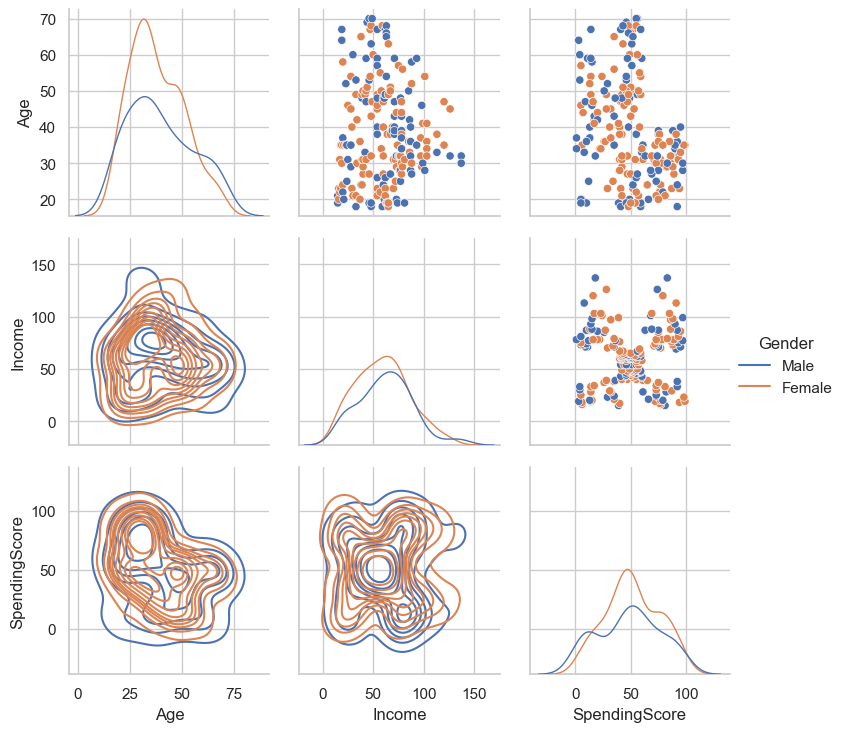

In [65]:
sns.pairplot(customer_set, vars=['Age', 'Income', 'SpendingScore'], hue='Gender')

g = sns.PairGrid(customer_set, vars=['Age', 'Income', 'SpendingScore'], hue='Gender')
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=1)
g.map_lower(sns.kdeplot)
g.add_legend()

plt.show()

**Висновки з 1-4 завдання (детальні)**

1. Пропущених значень немає.
2. Після річного прибутку у 80 тисяч доларів слідує різкий спад.
3. Більшість клієнтів віком від 20 до 50 років.
4. Між доходом і оцінкою витрат немає сильної кореляції.
5. Серед молодших людей є група з високими витратами.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Gender distribution (relative):
Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64


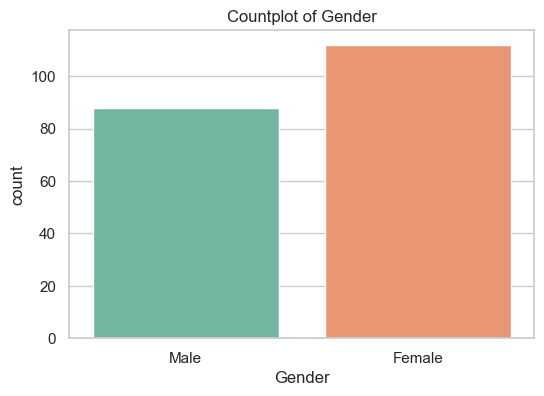

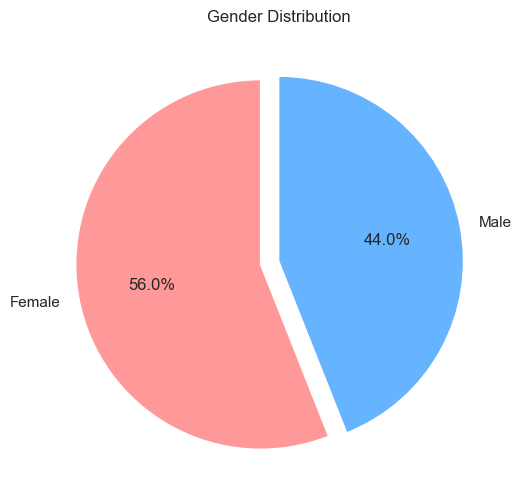

In [66]:
gender_counts = customer_set['Gender'].value_counts(normalize=True)
print("Gender distribution (relative):")
print(gender_counts)

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=customer_set, palette='Set2')
plt.title('Countplot of Gender')

plt.figure(figsize=(6, 6))
gender_counts.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, explode=(0.1, 0))

plt.title('Gender Distribution')

plt.ylabel('')
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

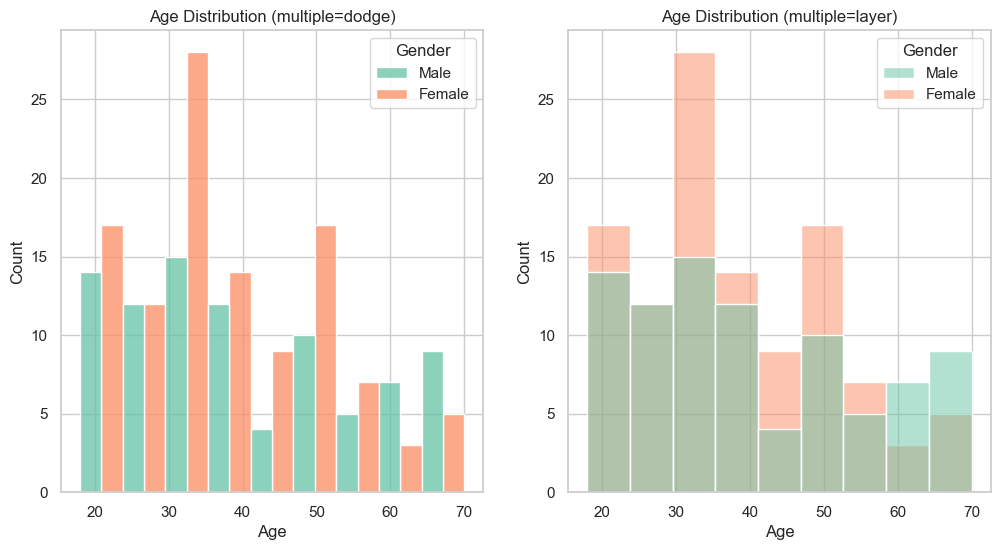

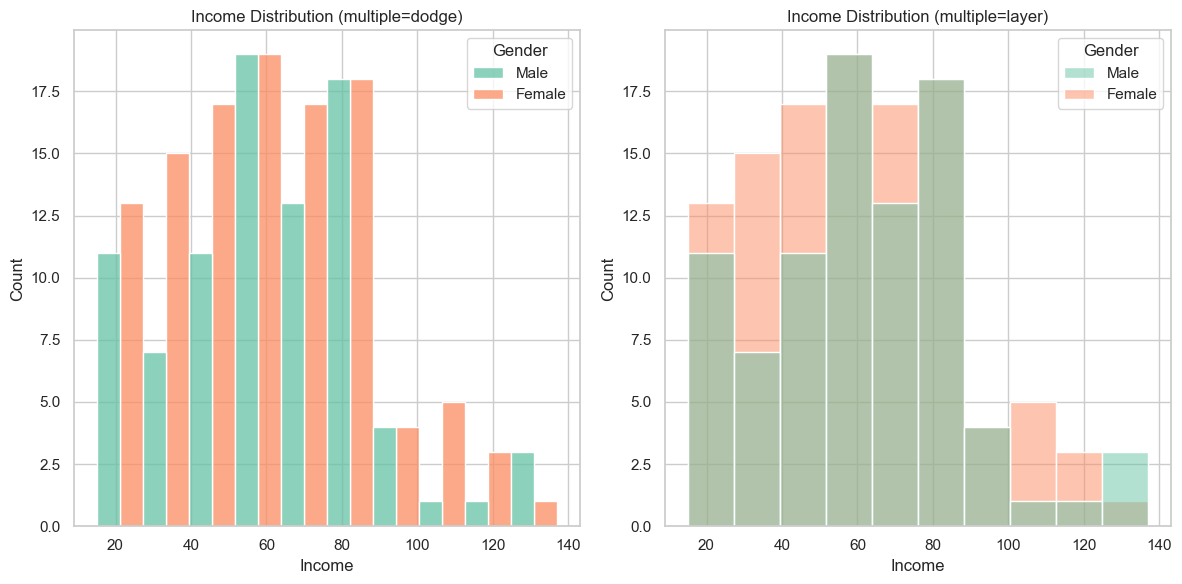

In [67]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', palette='Set2')
plt.title('Age Distribution (multiple=dodge)')

plt.subplot(1, 2, 2)
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='layer', palette='Set2')
plt.title('Age Distribution (multiple=layer)')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='dodge', palette='Set2')
plt.title('Income Distribution (multiple=dodge)')

plt.subplot(1, 2, 2)
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', palette='Set2')
plt.title('Income Distribution (multiple=layer)')

plt.tight_layout()
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



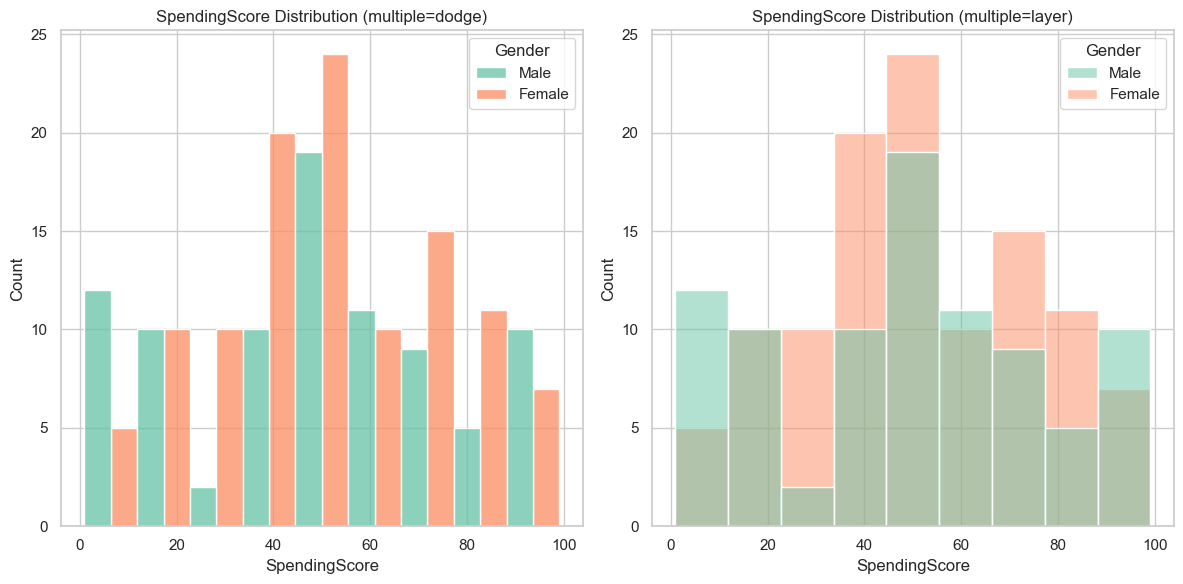

In [68]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', palette='Set2')
plt.title('SpendingScore Distribution (multiple=dodge)')

plt.subplot(1, 2, 2)
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', palette='Set2')
plt.title('SpendingScore Distribution (multiple=layer)')

plt.tight_layout()
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

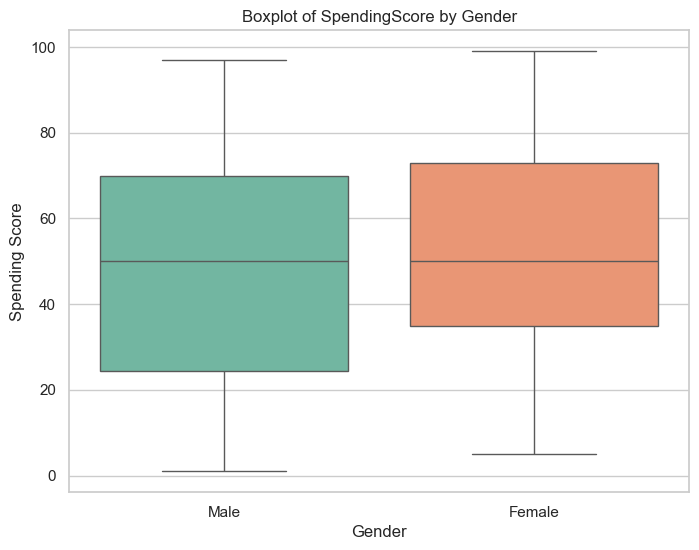

In [69]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='SpendingScore', data=customer_set, palette='Set2')

plt.title('Boxplot of SpendingScore by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score')

plt.show()

**Висновки з завдання 5 - 8(детальні)**

1. Яке співвідношення груп чоловіків та жінок? 56% жінок і 44% чоловіків.
2. Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? Можна згрупувати клієнтів за доходом та рівнем витрат. Дивлячись на графіки розподілу, важко сказати однозначно, що представники якоїсь із статей витрачають більше, але в діапазонах SpendingScore 20-50 і 70-80 жінки переважають.
3. Чи є різниця між витратами у чоловіків та жінок? На графіку boxplot видно, що у жінок SpendingScore вище.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

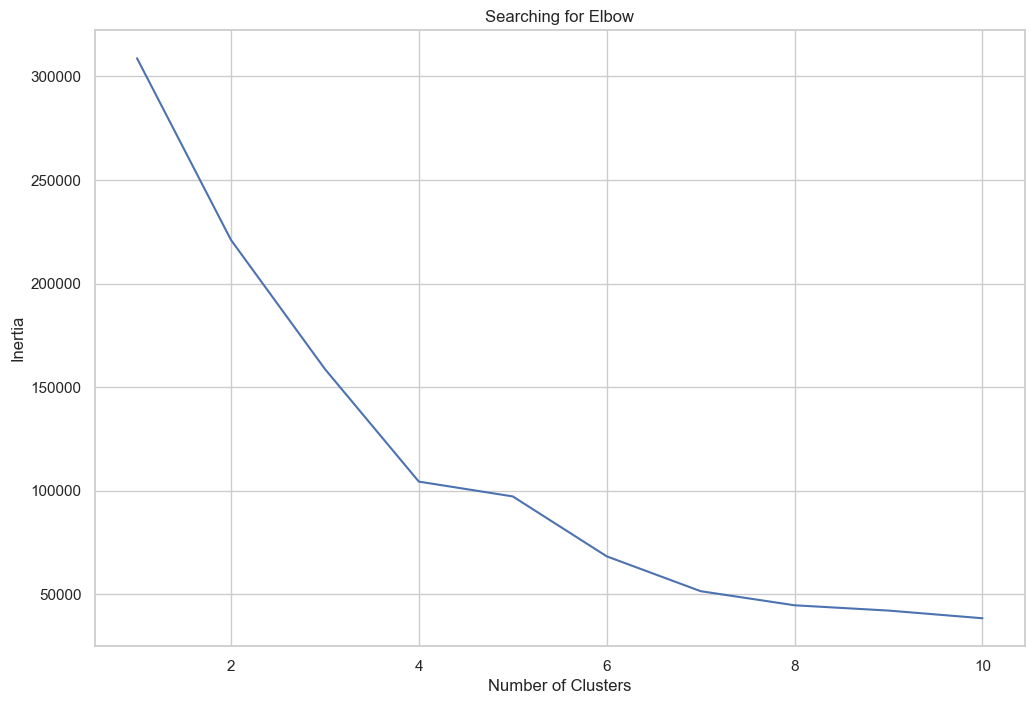

In [70]:
X = customer_set.drop(['Gender'], axis=1)

clusters = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')

plt.show()

**Висновки з завдання 9 (детальні)** 

1.  Після 5-6 кластерів зменшення інерції різко сповільнюється, тому можна припустити, що кількість оптимальних кластерів буде 5 або 6.
2.  Алгоритм кластеризації, такий як KMeans, обчислює відстані між точками на основі числових характеристик. Змінна Gender є категоріальною і не є корисною для кластеризації, оскільки її значення не можуть бути переведені безпосередньо в числові дані.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

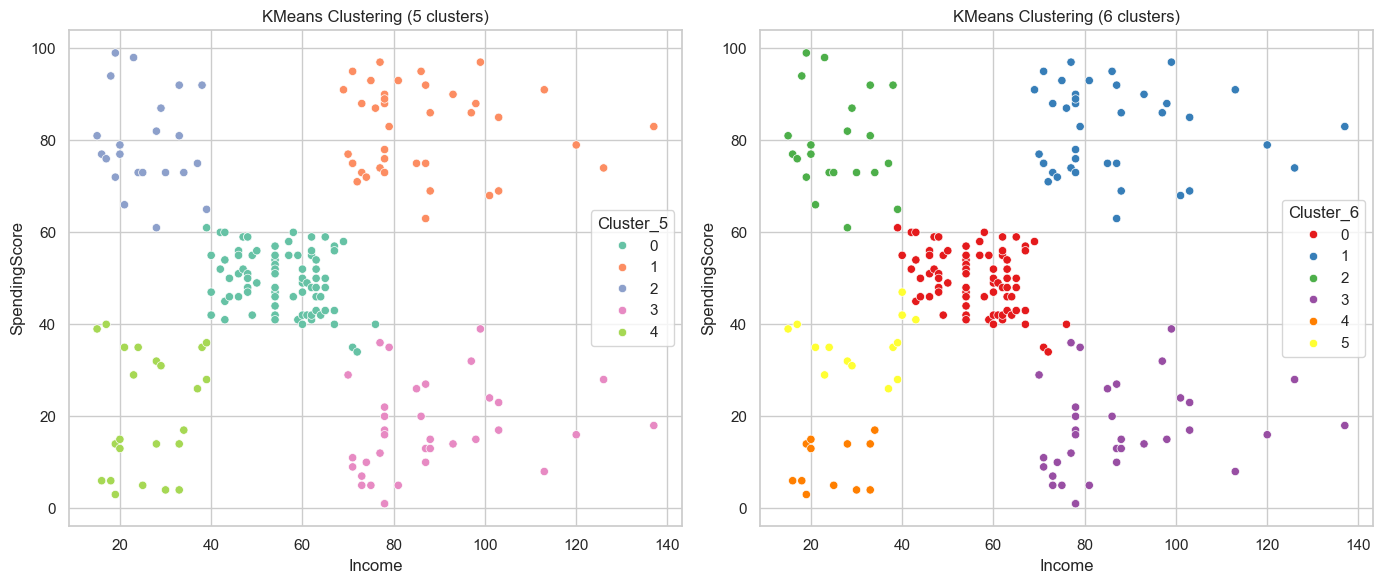

In [71]:
X = customer_set[['Income', 'SpendingScore']]

kmeans_5 = KMeans(n_clusters=5, random_state=42)
customer_set['Cluster_5'] = kmeans_5.fit_predict(X)

kmeans_6 = KMeans(n_clusters=6, random_state=42)
customer_set['Cluster_6'] = kmeans_6.fit_predict(X)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Cluster_5', palette='Set2', ax=axes[0])
axes[0].set_title('KMeans Clustering (5 clusters)')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('SpendingScore')

sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Cluster_6', palette='Set1', ax=axes[1])
axes[1].set_title('KMeans Clustering (6 clusters)')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('SpendingScore')

plt.tight_layout()
plt.show()

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [72]:
X = customer_set[['Income', 'SpendingScore', 'Age']]

kmeans_5 = KMeans(n_clusters=5, random_state=42)
customer_set['Cluster_5'] = kmeans_5.fit_predict(X)

kmeans_6 = KMeans(n_clusters=6, random_state=42)
customer_set['Cluster_6'] = kmeans_6.fit_predict(X)

fig_5 = px.scatter_3d(customer_set, x='Income', y='SpendingScore', z='Age', color='Cluster_5', 
                      title='KMeans Clustering (5 clusters)', 
                      labels={'Income': 'Income', 'SpendingScore': 'Spending Score', 'Age': 'Age'})
fig_5.show()

fig_6 = px.scatter_3d(customer_set, x='Income', y='SpendingScore', z='Age', color='Cluster_6', 
                      title='KMeans Clustering (6 clusters)', 
                      labels={'Income': 'Income', 'SpendingScore': 'Spending Score', 'Age': 'Age'})
fig_6.show()

**Висновки з завдання 10 - 11 (детальні)** 

1. На першій ілюстрації (5 кластерів) клієнти з доходом 20-40 і оцінкою витрат 0-40 об'єднані в одну групу, а на другій (6) представляють собою два кластери. Це дає кращу сегментацію. Отже, 6 - оптимальна кількість кластерів.
2. Отримані результати можна використати для передбачення фінансової поведінки і прийняття рішень щодо клієнтів.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


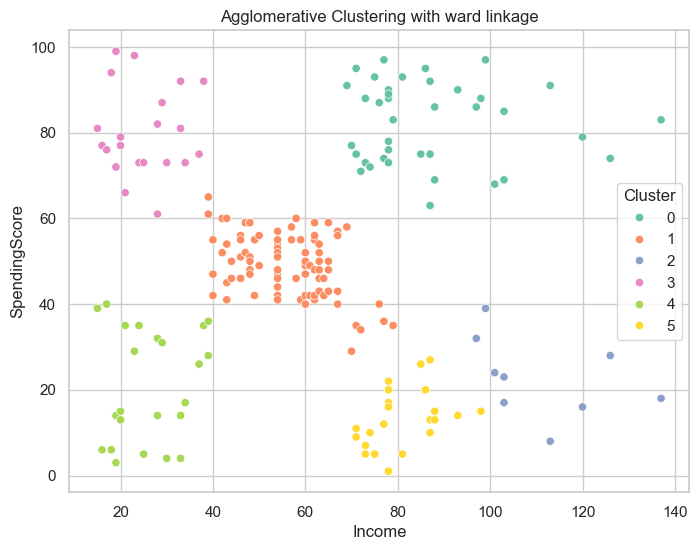

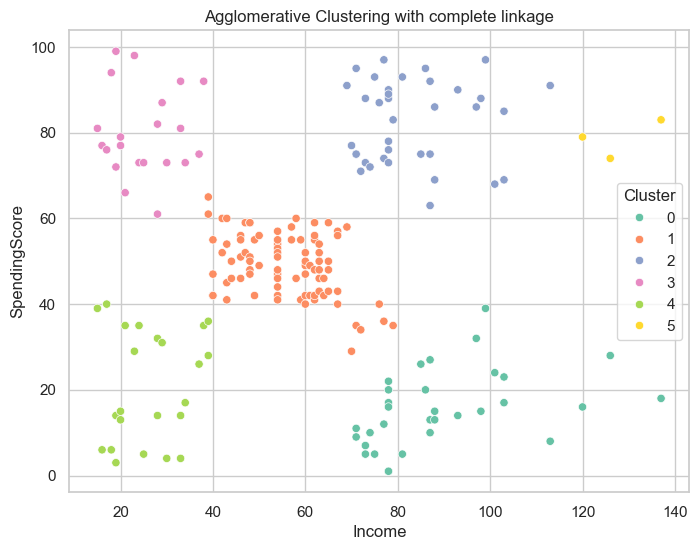

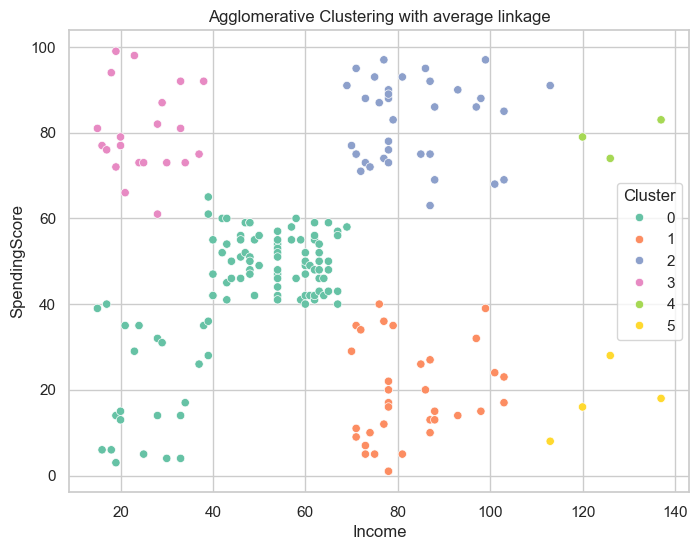

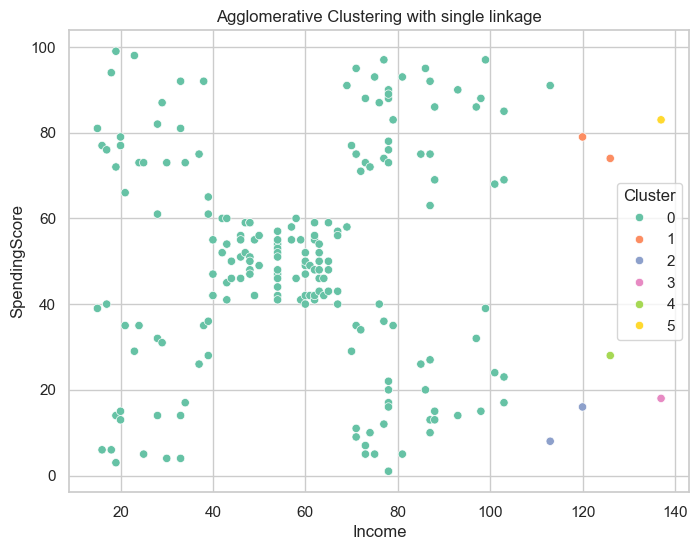

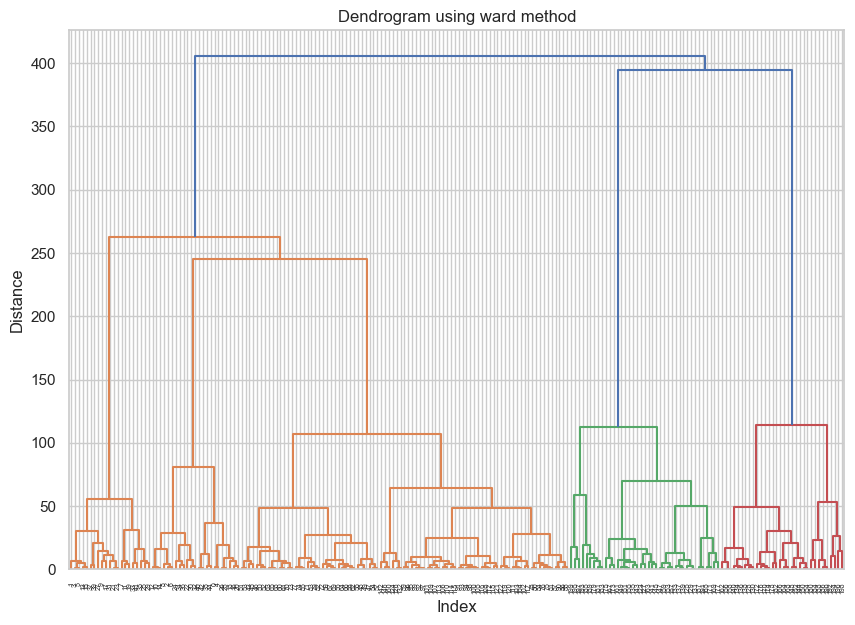

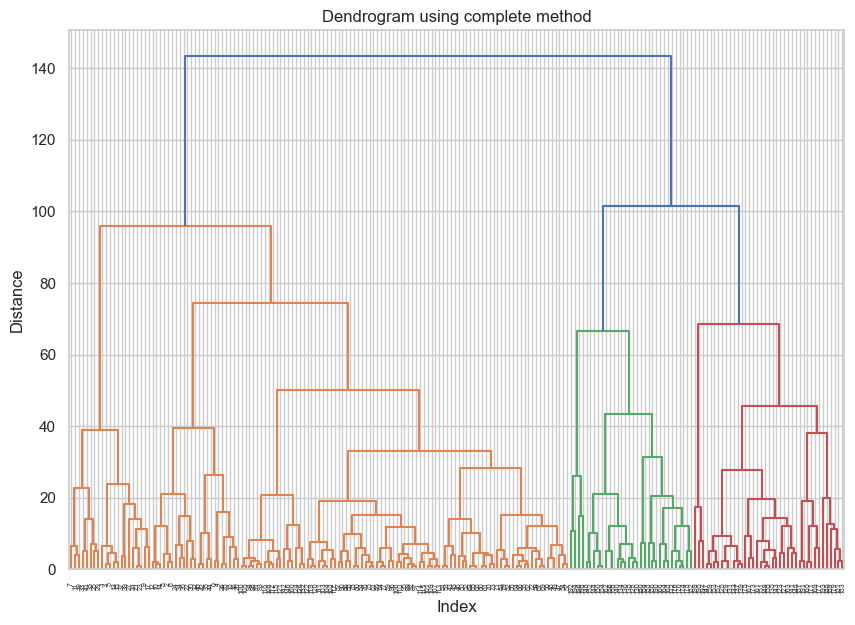

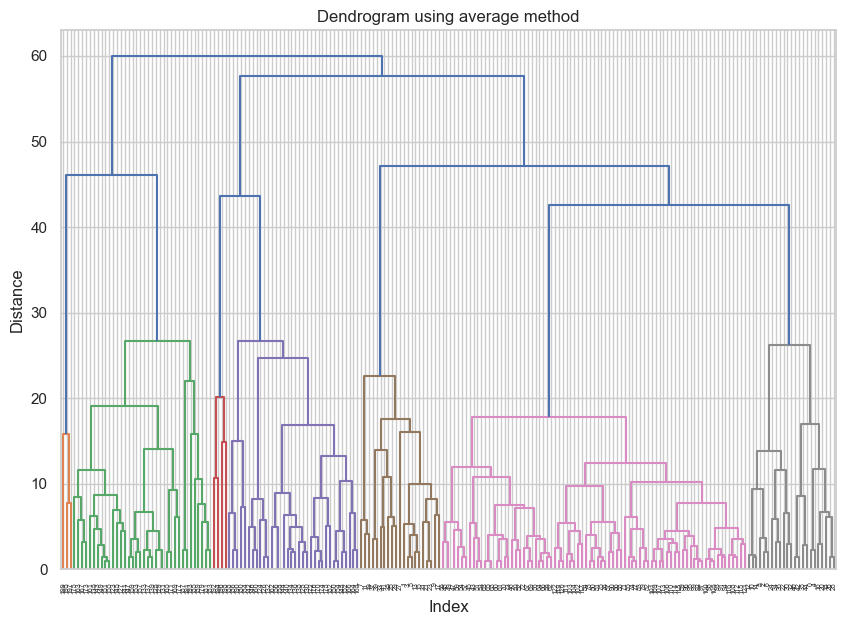

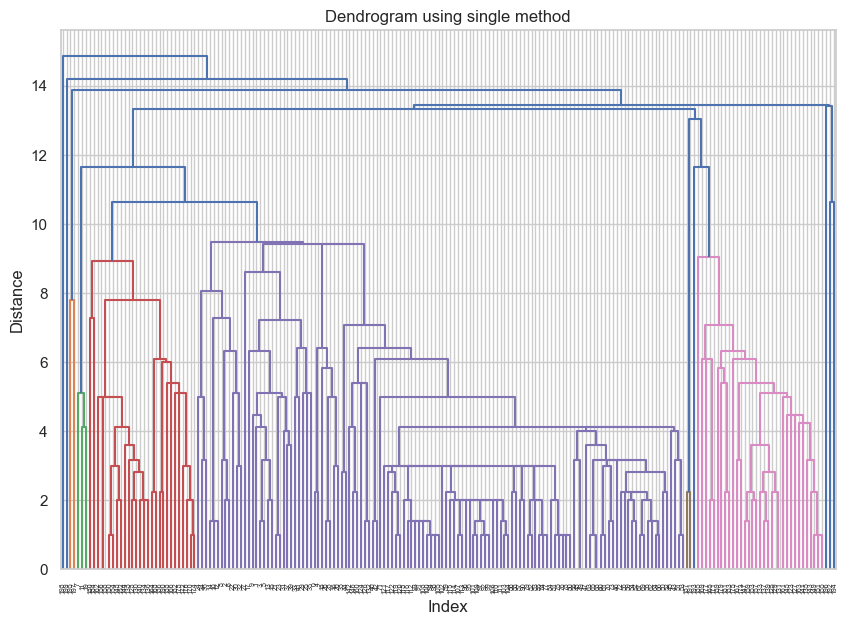

In [73]:
X = customer_set[['Income', 'SpendingScore']]

for linkage_method in ['ward', 'complete', 'average', 'single']:
    agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage=linkage_method)
    customer_set[f'Cluster_{linkage_method}'] = agglomerative_clustering.fit_predict(X)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=f'Cluster_{linkage_method}', palette='Set2')
    plt.title(f'Agglomerative Clustering with {linkage_method} linkage')
    plt.xlabel('Income')
    plt.ylabel('SpendingScore')
    plt.legend(title='Cluster')
    plt.show()

methods = ['ward', 'complete', 'average', 'single']
for method in methods:
    Z = hierarchy.linkage(X, method=method)
    
    plt.figure(figsize=(10, 7))
    hierarchy.dendrogram(Z)
    plt.title(f'Dendrogram using {method} method')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()

**Висновки з завдання 12 (детальні)**

1. Метод Ward намагається мінімізувати дисперсію в кластерах. Він створює більш компактні та рівномірні кластери.
2. Метод Complete визначає відстань між двома кластерами як відстань між найбільш віддаленими точками в цих кластерах. Це призводить до більш довгих і розтягнутих кластерів, а також до класифікації кластера як одиничної точки, якщо вона віддалена від інших.
3. Метод Average визначає відстань як середнє відстаней між усіма точками в обох кластерах. Він більш гнучкий, оскільки дозволяє не настільки сильне "спресовування" кластерів, як у методу Ward.
4. Метод Single визначає відстань між кластерами як відстань між найближчими точками. Він приводить до створення досить неінтуїтивних кластерів.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

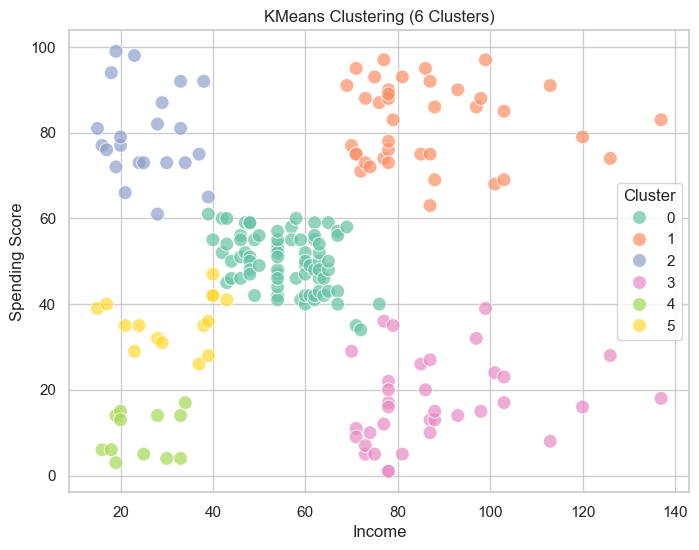

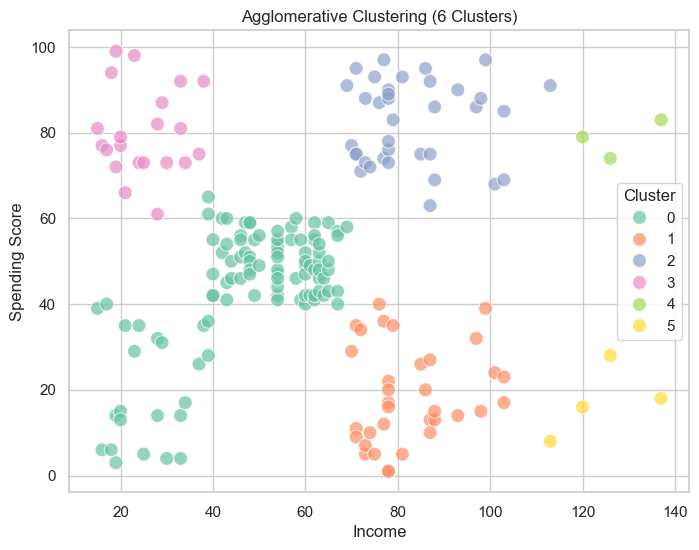

In [74]:
kmeans = KMeans(n_clusters=6, random_state=42)
customer_set['Cluster_KMeans'] = kmeans.fit_predict(X)

agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='average')
customer_set['Cluster_Agglomerative'] = agg_clustering.fit_predict(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Cluster_KMeans', palette='Set2', s=100, alpha=0.7)
plt.title('KMeans Clustering (6 Clusters)')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue='Cluster_Agglomerative', palette='Set2', s=100, alpha=0.7)
plt.title('Agglomerative Clustering (6 Clusters)')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()

**Висновки з завдання 13 (детальні)**

1. У KMeans кластери виглядають більш компактними, оскільки метод намагається мінімізувати відстань між точками та центроїдами.
2. Agglomerative clustering має більш розкидані кластери, оскільки це ієрархічний метод, який визначає кластери на основі відстані між точками.
3. У Agglomerative методі є деяка "розмитість" між кластерами, оскільки він формує їх поступово, з'єднуючи найближчі точки.
4. У KMeans видно чіткі межі між групами, особливо для кластерів із низьким або високим доходом.